# Seaborn作业

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# 设置风格和字体
sns.set(style="darkgrid", rc={"font.sans-serif":"SimHei"})

# 一、 有一组温度数据，按照时间和温度绘制折线图。

Text(0, 0.5, '温度')

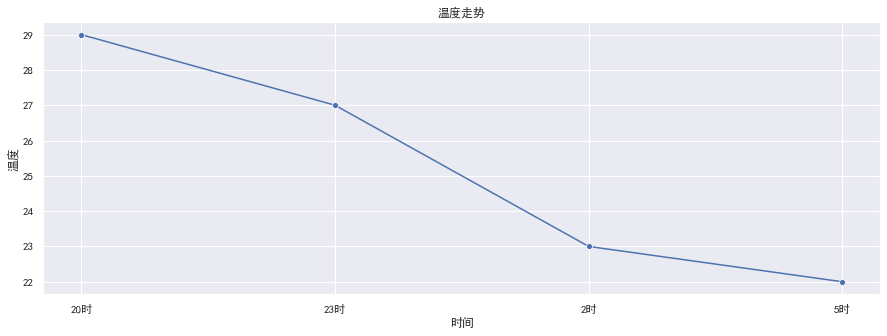

In [2]:
# 数据
bj_temps = [29,27,23,22]
bj_hours = ["20时","23时","2时","5时"]

# 绘制
plt.figure(figsize=(15, 5))
axes = sns.lineplot(range(4), bj_temps, marker="o")
axes.set_xticks(range(4))
axes.set_xticklabels(bj_hours)
axes.set_title("温度走势")
axes.set_xlabel("时间")
axes.set_ylabel("温度")

# 二、有以下国家数据，根据时间绘制条形图。

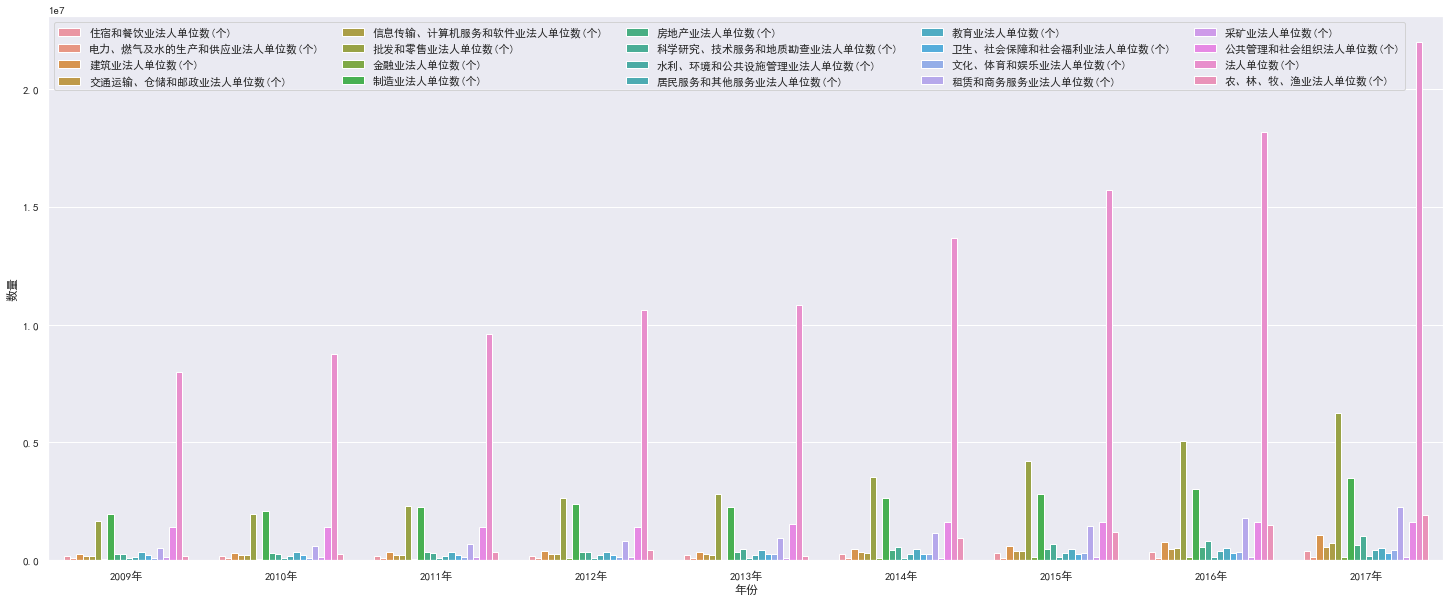

In [3]:
legals = pd.read_csv("法人人数年度数据.csv", encoding="gbk")
legals = legals.fillna(0)
# legals

# 将指标的列数设置为索引
new_legals = legals.set_index("指标")
# data1是一个二级索引的Series对象
data1 = new_legals.stack()
# 通过reset_index函数将Series对象的二级索引均转化为DataFrame对象的列值
data2 = data1.reset_index()
# 指定列名
data2.columns = ["指标", "年份", "数量"]
legals = data2.sort_values(["年份"])
legals

# 绘图
plt.figure(figsize=(25,10))
sns.barplot(x="年份", y="数量", data=legals, hue="指标")
plt.legend(ncol=5)

# 三、有链家网的数据，请按照以下要求实现绘图：
1. x轴是Region（行政区），y轴是每个区的平均每平米的单价，绘制条形图。x轴是Region（行政区），y轴是每平米的单价，绘制箱线图。x轴是Region，y轴是每平米的单价，绘制swarm图。以上三个图需要绘制在一个figure上。
2. 使用FacetGrid绘制尺寸与单价的关系，并且区分有无电梯。

In [40]:
# 数据
lianjia = pd.read_csv("lianjia.csv")
lianjia_t = lianjia.groupby(by=["Region"])["UnitPrice"].mean().sort_values().reset_index()
lianjia_t.columns = ['Region', "AvgPrice"]
# lianjia_t
lianjia

,Num,Direction,Elevator,Floor,Garden,Layout,Region,Price,Renovation,Size,Year,UnitPrice
0,0,南北,无电梯,低楼层(共6层),翠竹苑,3室1厅,浦东,365.0,简装,77.84,1995.0,4.689106
1,1,南,有电梯,低楼层(共36层),百汇园,3室2厅,徐汇,1449.0,精装,145.20,1995.0,9.979339
2,2,南北,有电梯,中楼层(共26层),仁恒河滨城(二期),3室2厅,浦东,1630.0,精装,161.94,1995.0,10.065456
3,3,南,有电梯,高楼层(共30层),财富海景花园,3室2厅,浦东,2000.0,精装,185.00,1995.0,10.810811
4,4,东,有电梯,中楼层(共26层),仁恒滨江园,3室2厅,浦东,1360.0,精装,130.41,1995.0,10.428648
...,...,...,...,...,...,...,...,...,...,...,...,...
1705,1705,南,无电梯,高楼层(共6层),水电新村,1室2厅,杨浦,260.0,精装,57.62,1995.0,4.512322
1706,1706,南,NaN,中楼层(共11层),祥安菊苑,3室2厅,浦东,250.0,其他,126.58,1995.0,1.975036
1707,1707,南北,无电梯,低楼层(共6层),梅陇四村,2室1厅,徐汇,320.0,其他,64.58,1995.0,4.955094
1708,1708,南,NaN,高楼层(共18层),翔和雅苑,2室1厅,嘉定,260.0,毛坯,69.60,1995.0,3.735632


D:\Andconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
D:\Andconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


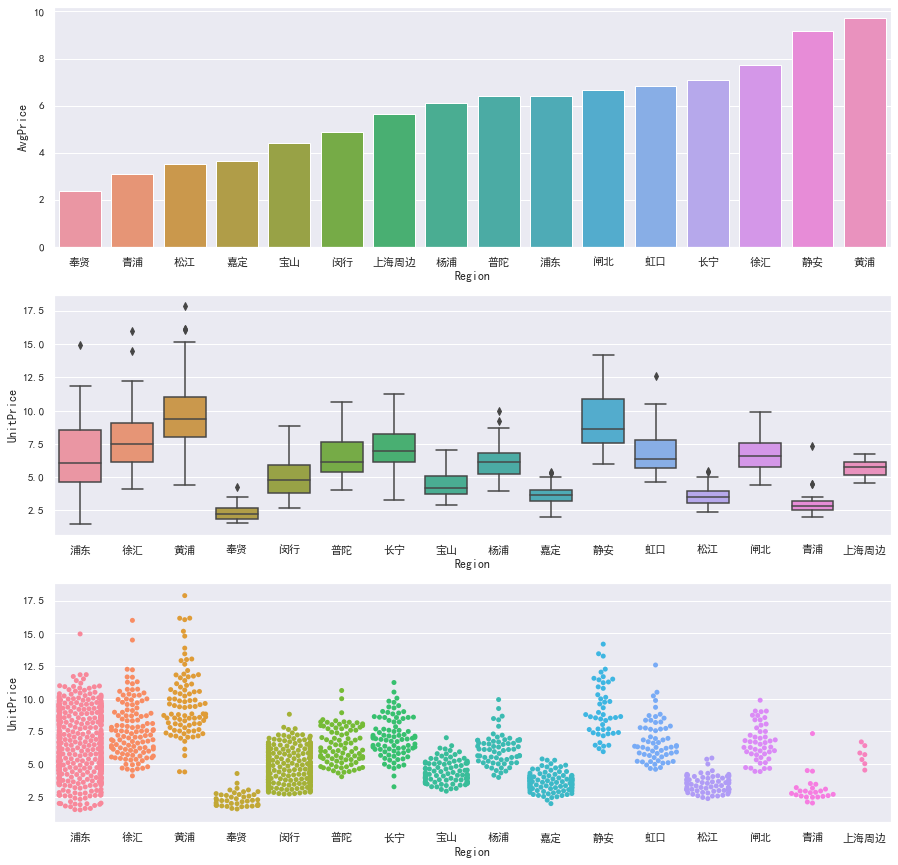

In [42]:
# 1
fig, axes = plt.subplots(3,1, figsize=(15,15))
ax1 = sns.barplot(x="Region", y="AvgPrice", data=lianjia_t, ax=axes[0])
ax2 = sns.boxplot(x="Region", y="UnitPrice", data=lianjia, ax=axes[1])
ax2 = sns.swarmplot(x="Region", y="UnitPrice", data=lianjia, ax=axes[2])

D:\Andconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Andconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


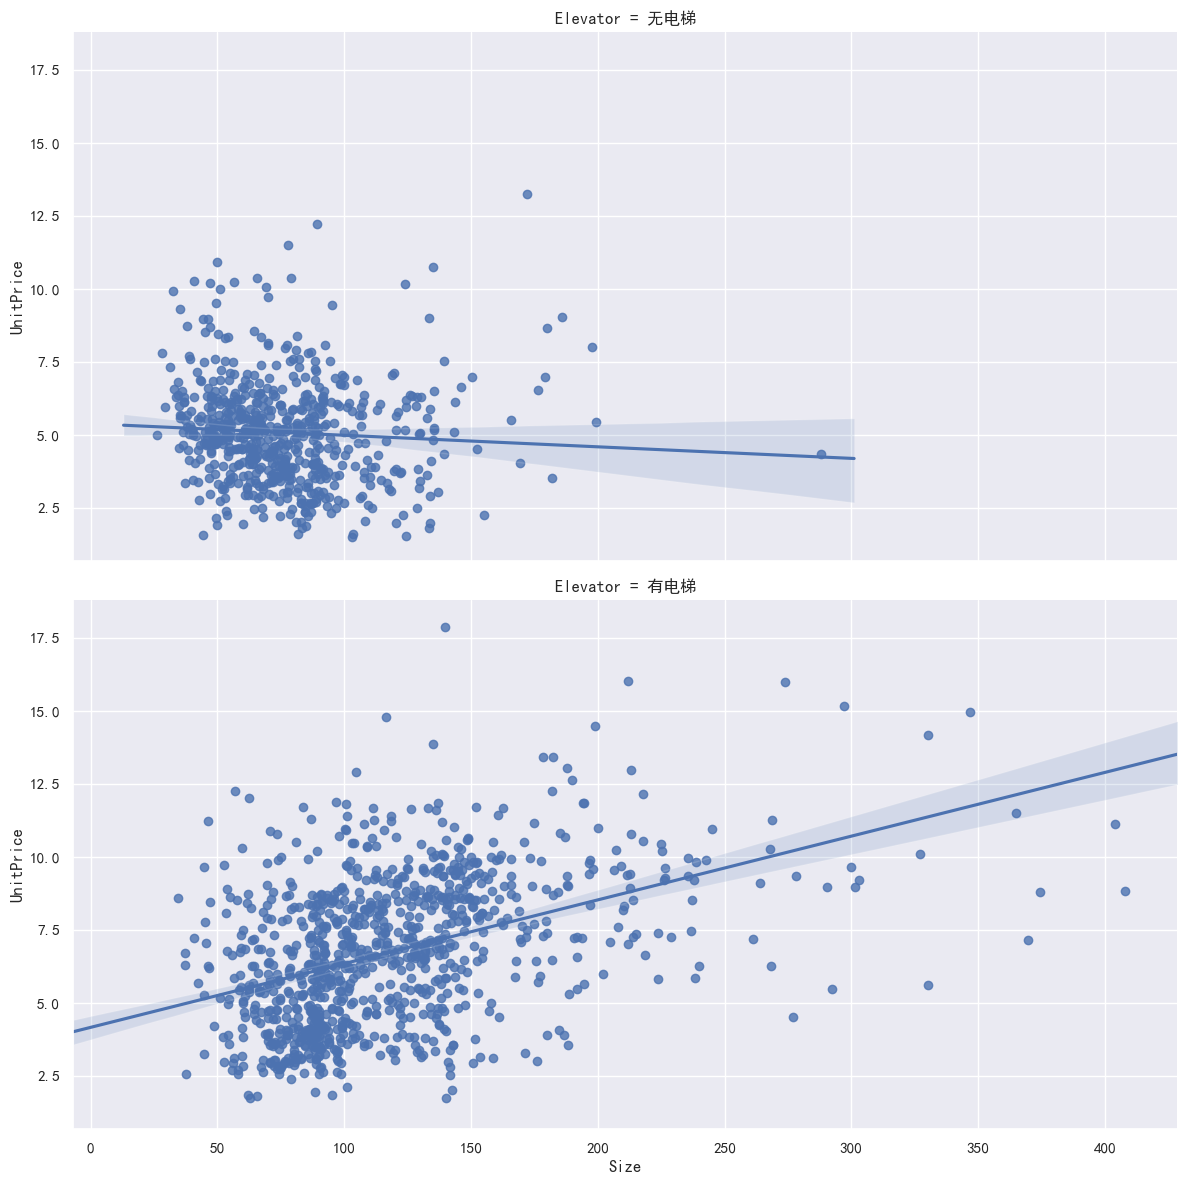

In [52]:
# 2 使用FacetGrid绘制尺寸与单价的关系，并且区分有无电梯。
g = sns.FacetGrid(lianjia,row="Elevator", height=6, aspect=2)
g.map(sns.regplot,"Size", "UnitPrice" )
g.add_legend()
g.fig.set_dpi(100)